# DIP Project
### Sajjad Hashembriki
### 98107077

## Classical Method

### Problem 1

In [330]:
#import libraries
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from tqdm import tqdm
import pandas as pd
import time
import math
from scipy import signal
from scipy.spatial import distance

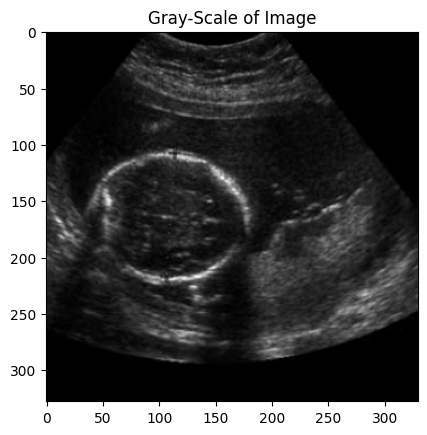

In [568]:
#load and plot example image
image = cv2.imread("exmaple.png")
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
img = image_gray
plt.title("Gray-Scale of Image")
plt.imshow(image_gray ,cmap = 'gray')

In [70]:
#reshape the image
image_gray_flat= image_gray.reshape(image_gray.shape[0] * image_gray.shape[1], 1)
#Clustering the image into 3 clusters
kmeans = KMeans(n_clusters=3,n_init='auto', random_state=0).fit(image_gray_flat)
clustered = kmeans.cluster_centers_[kmeans.labels_]

In [71]:
#assign each pixel to corresponding cluster
labels = kmeans.labels_
for n in range(3):
    image_cluster = []
    for i in range(len(labels)):
        if(labels[i] == n):
            image_cluster.append(1)
        else:
            image_cluster.append(0)
    if(n==0):
        cluster0= np.array(image_cluster).reshape(image_gray.shape)
    if(n==1):
        cluster1= np.array(image_cluster).reshape(image_gray.shape)
    if(n==2):
        cluster2= np.array(image_cluster).reshape(image_gray.shape)
    reshape_clustered = np.array(image_cluster).reshape(image_gray.shape)

Text(0.5, 1.0, 'bright Cluster')

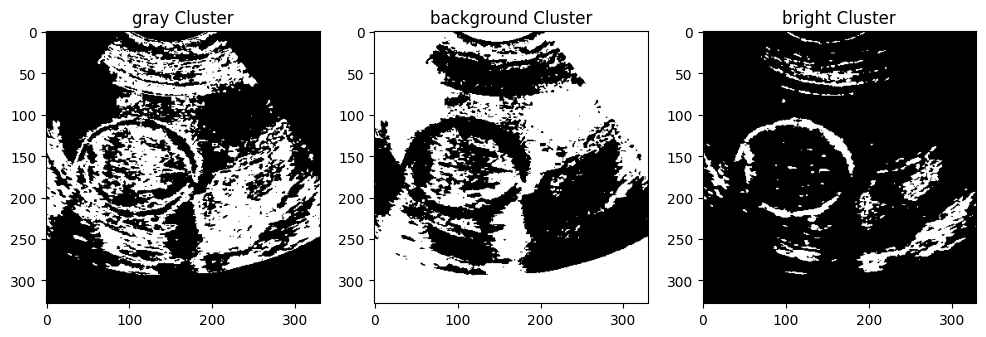

In [72]:
#save the image clusters
gray = cluster0.copy()
background = cluster1.copy()
bright = cluster2.copy()
#plot each cluster separately
fig ,axes = plt.subplots(1,3,figsize=(12,6))
axes[0].imshow(gray ,cmap='gray')
axes[0].set_title("gray Cluster")
axes[1].imshow(background,cmap='gray')
axes[1].set_title("background Cluster")
axes[2].imshow(bright,cmap='gray')
axes[2].set_title("bright Cluster")

### Problem 2

Text(0.5, 1.0, 'Opening Result')

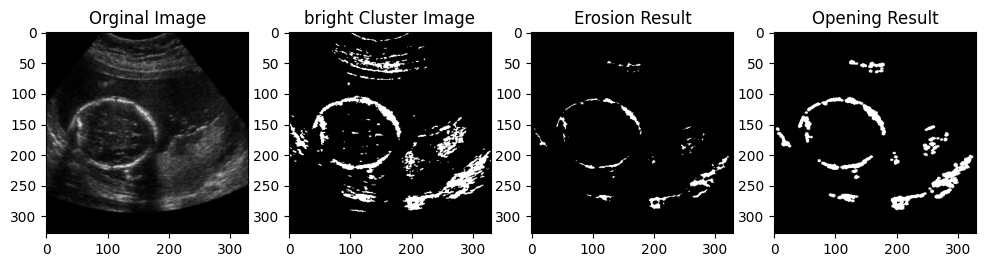

In [579]:
#remove small objects by morphological methods
#create an ellipse structure elment
kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
erosion = cv2.erode(bright.astype('uint8'),kernel,iterations = 1)
opening = cv2.morphologyEx(bright.astype('uint8'), cv2.MORPH_OPEN, kernel,iterations =1)
fig ,axes = plt.subplots(1,4,figsize=(12,6))
axes[0].imshow(image_gray,cmap='gray')
axes[0].set_title("Orginal Image")
axes[1].imshow(bright,cmap='gray')
axes[1].set_title("bright Cluster Image")
axes[2].imshow(erosion ,cmap='gray')
axes[2].set_title("Erosion Result")
axes[3].imshow(opening,cmap='gray')
axes[3].set_title("Opening Result")

For remove small object and noise two methods Opening and Erosion are helpful.But as we see the Opening result is better than a single erosion.Thus i use the Opening result.

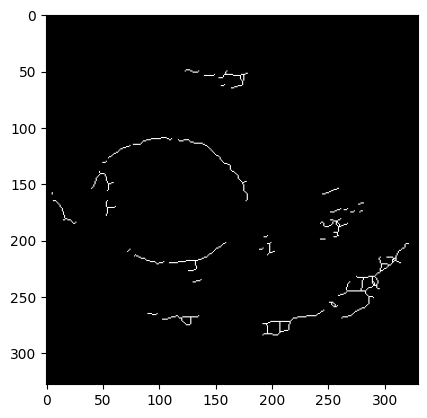

In [533]:
from skimage.morphology import skeletonize
skeleton = skeletonize(opening)
plt.imshow(skeleton ,cmap = 'gray')

### Problem 3

Description of iterative randomised Hough transform in the REPORT.

### Problem 4

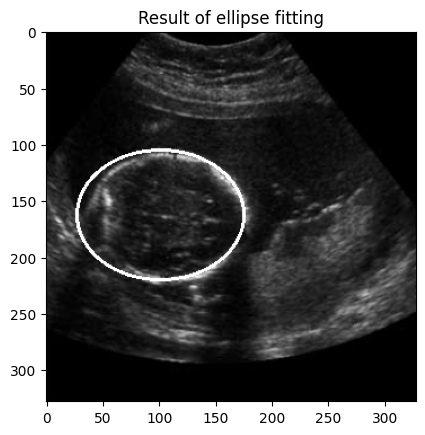

In [583]:
# implementation of randomized hough transform
Tf = 30000
Tmin = 60
f = 0
#for plot the result
img_color = cv2.imread('exmaple.png')
start = time.time()
circles = []
Ta = 6
Td = 10
Tr = 0.6
LOW = 250
HIGH = 255
V = []
def get_center(p1, p2, p3):
    (x1, y1) = p1
    (x2, y2) = p2
    (x3, y3) = p3
    a = [[x1 ** 2 + y1 ** 2, y1, 1],
         [x2 ** 2 + y2 ** 2, y2, 1],
         [x3 ** 2 + y3 ** 2, y3, 1]]
    b = [[x1, x1 ** 2 + y1 ** 2, 1],
         [x2, x2 ** 2 + y2 ** 2, 1],
         [x3, x3 ** 2 + y3 ** 2, 1]]
    c = [[x1, y1, 1],
         [x2, y2, 1],
         [x3, y3, 1]]
    a = np.linalg.det(a)
    b = np.linalg.det(b)
    c = np.linalg.det(c)
    if c != 0:
        h = a / (2 * c)
        k = b / (2 * c)
    else:
        h = k = None
    vec = (h, k)
    return vec
if __name__ == '__main__':
    Gaussian = np.array([[1, 2, 1],
                         [2, 4, 2],
                         [1, 2, 1]])
    Denoised_img = signal.convolve2d(img, Gaussian, boundary='symm', mode='same')
    Denoised_img =  Denoised_img//16.0
    Denoised_img = np.uint8(Denoised_img)
    Edge_img = cv2.Canny(Denoised_img, 30, 200)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if Edge_img[x][y] == 255:
                V.append((x, y))
    while True:
        if f == Tf or len(V) < Tmin:
            break
        else:
            rand_set = np.random.permutation(len(V)).tolist()[:4]
            recy = []
            for i in rand_set:  
                recy.append(V[i])
            for item in recy:
                V.remove(item)  
            
            candidates = []
            possibles = [[0, 1, 2, 3], [0, 1, 3, 2], [0, 2, 3, 1], [1, 2, 3, 0]]
            for item in possibles:
                dist1 = distance.euclidean(recy[item[0]], recy[item[1]])
                dist2 = distance.euclidean(recy[item[1]], recy[item[2]])
                dist3 = distance.euclidean(recy[item[2]], recy[item[0]])
                if dist1 > Ta and dist2 > Ta and dist3 > Ta:
                    (x1, y1) = recy[item[0]]
                    (x2, y2) = recy[item[1]]
                    (x3, y3) = recy[item[2]]
                    o = get_center((x1, y1), (x2, y2), (x3, y3))  
                    if o[0] is None or o[1] is None:
                        continue
                    r = distance.euclidean(recy[item[0]], o)
                    if math.fabs(distance.euclidean(recy[item[3]], o) - r) > Td:
                        candidates.append(item)  
            if len(candidates) > 0:
                for item in candidates:
                    C = 0
                    pt_i = recy[item[0]]
                    pt_j = recy[item[1]]
                    pt_k = recy[item[2]]
                    o = get_center(pt_i, pt_j, pt_k) 
                    if o[0] is None or o[1] is None:
                        continue
                    r_ijk = distance.euclidean(pt_i, o)
                    pix_recy = []
                    for pix in V:
                        dl = math.fabs(distance.euclidean(pix, o) - r_ijk)
                        if dl <= Td:
                            C += 1
                            pix_recy.append(pix)
                    if C >= r_ijk * 3:
                        for pix_r in pix_recy:
                            V.remove(pix_r)
                        tmp = [pt_i, pt_j, pt_k, o, r_ijk]
                        circles.append(tmp)
                        f = 0
                    else:
                        f += 1  
                        break  
            else:
                f += 1
                for item in recy:
                    V.append(item)
    for item in circle:
        x = int(item[3][0])
        y = int(item[3][1])
        cv2.circle(img_color, (y, x), int(item[4]), color=[255, 255, 255])
    plt.imshow(img_color)
    plt.title("Result of ellipse fitting")


## Deep learning Methods

### Problem 5

Description of the structure of the U-Net in the REPORT.

### Problem 6

In [371]:
#data preprocessing
# Define paths to images directory
image_dir = 'dataset/training_set/training_set'

# Read images
image_data = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        # Read image using OpenCV
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)   
        # Append data to lists
        image_data.append(image)
        
# Convert lists to NumPy arrays
image_data = np.array(image_data)

# Verify the shapes of the image_data
print("Image Data Shape:", image_data.shape)

Image Data Shape: (1998,)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11300\3054854189.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  image_data = np.array(image_data)


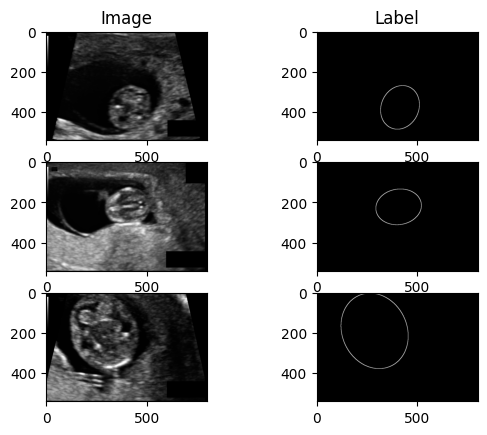

In [406]:
#create labels and image sets
X = image_data[::2]
Y = image_data[1::2]
#show some datapoints of training set
fig ,ax = plt.subplots(3,2)
for i in range(3):
    for j in range(2):
        if(j%2==0):
            ax[i][j].imshow(X[i],cmap='gray')
            if i==0:
                ax[i][j].set_title("Image")
        if(j%2!=0):
            ax[i][j].imshow(Y[i],cmap='gray')
            if i==0:
                ax[i][j].set_title("Label")

In [407]:
#resize the images and labels
IMG_CHANNELS = 1
IMG_WIDTH = 128
IMG_HEIGHT = 128
X_resize = np.zeros((999,IMG_HEIGHT,IMG_WIDTH))
Y_resize = np.zeros((999,IMG_HEIGHT,IMG_WIDTH))

for i in range(999):
    X_resize[i] = cv2.resize(X[i],(128,128))
    Y_resize[i] = cv2.resize(Y[i],(128,128))

In [413]:
#split dataset into training and test sets 4:1
X_train, X_test, Y_train, Y_test = train_test_split(X_resize,Y_resize, test_size=0.2, random_state=4,shuffle=True)

In [414]:
#implementation of U-net

# Create a function for a convolution block
def conv_block(inputs, num_filters):
    x = tf.keras.layers.Conv2D(num_filters, (3, 3), activation="relu",kernel_initializer="he_normal", padding="same")(inputs)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Conv2D(num_filters, (3, 3), activation="relu",kernel_initializer="he_normal", padding="same")(x)
    return x

# Create a function for the expanding path
def upsample_block(inputs, conv_prev, num_filters):
    up = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding="same")(inputs)
    concat = tf.keras.layers.concatenate([up, conv_prev])
    conv = conv_block(concat, num_filters)
    return conv

In [415]:
# Inputs
inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

# Normalization
s = tf.keras.layers.Lambda(lambda x: x/255.0)(inputs) 

# Contraction path
c1 = conv_block(s, 16)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = conv_block(p1, 32)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = conv_block(p2, 64)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = conv_block(p3, 128)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

c5 = conv_block(p4, 256)

# Expansive path
c6 = upsample_block(c5, c4, 128)
c7 = upsample_block(c6, c3, 64)
c8 = upsample_block(c7, c2, 32)
c9 = upsample_block(c8, c1, 16)

# Output layer
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [416]:
# Model
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

# Compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 lambda_6 (Lambda)              (None, 128, 128, 1)  0           ['input_11[0][0]']               
                                                                                                  
 conv2d_117 (Conv2D)            (None, 128, 128, 16  160         ['lambda_6[0][0]']               
                                )                                                                 
                                                                                            

In [483]:
results = model.fit(
    X_train, 
    Y_train, 
    validation_split = 0.1, 
    batch_size = 16, 
    epochs = 25)

Epoch 1/10
45/45 [==============================] - 45s 992ms/step - loss: -26.6735 - accuracy: 0.8534 - val_loss: -25.8464 - val_accuracy: 0.8747
Epoch 2/10
45/45 [==============================] - 47s 1s/step - loss: -26.6314 - accuracy: 0.8507 - val_loss: -25.7947 - val_accuracy: 0.8726
Epoch 3/10
45/45 [==============================] - 54s 1s/step - loss: -26.7301 - accuracy: 0.8582 - val_loss: -25.9848 - val_accuracy: 0.8628
Epoch 4/10
45/45 [==============================] - 57s 1s/step - loss: -26.7612 - accuracy: 0.8601 - val_loss: -26.0179 - val_accuracy: 0.8702
Epoch 5/10
45/45 [==============================] - 58s 1s/step - loss: -26.7830 - accuracy: 0.8613 - val_loss: -26.0039 - val_accuracy: 0.8728
Epoch 6/10
45/45 [==============================] - 58s 1s/step - loss: -26.8401 - accuracy: 0.8651 - val_loss: -26.0451 - val_accuracy: 0.8655
Epoch 7/10
45/45 [==============================] - 58s 1s/step - loss: -26.8869 - accuracy: 0.8677 - val_loss: -26.0326 - val_accura

In [424]:
# Predictions
idx = random.randint(0, len(X_train))

preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose = 1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose = 1)
preds_test = model.predict(X_test, verbose = 1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

7/7 [==============================] - 2s 267ms/step


Text(0.5, 1.0, 'Predicted Label')

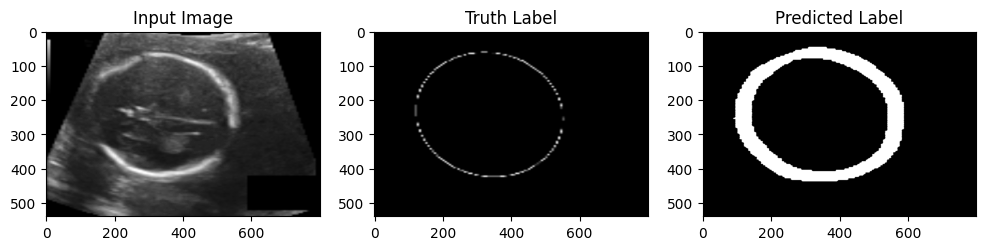

In [425]:
# Select a random index from training set
ix = random.randint(0, len(preds_train_t))

fig ,ax = plt.subplots(1,3,figsize=(12,6))
# Display the input image
ax[0].imshow(cv2.resize(X_train[ix],(800,540)),cmap='gray')
ax[0].set_title("Input Image")

# Display the ground truth label
ax[1].imshow(cv2.resize(Y_train[ix],(800,540)),cmap='gray')
ax[1].set_title("Truth Label")

# Display the predicted lebel
ax[2].imshow(cv2.resize(np.squeeze(preds_train_t[ix]),(800,540)),cmap='gray')
ax[2].set_title("Predicted Label")

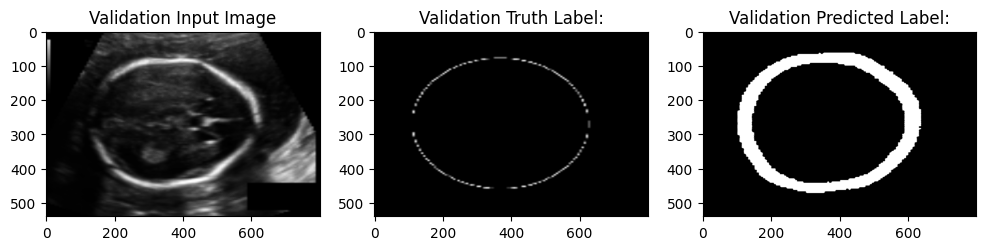

In [426]:
# Select a random index from validation set
ix = random.randint(0, len(preds_val_t))

fig ,ax = plt.subplots(1,3,figsize=(12,6))

# Calculate the index from where validation data starts
val_data_start = int(X_train.shape[0] * 0.9)

# Display the validation input image
ax[0].set_title("Validation Input Image")
ax[0].imshow(cv2.resize(X_train[val_data_start:][ix],(800,540)),cmap='gray')

# Display the validation ground truth Label
ax[1].set_title("Validation Truth Label:")
ax[1].imshow(cv2.resize(np.squeeze(Y_train[val_data_start:][ix]),(800,540)),cmap='gray')

# Display the validation predicted Label
ax[2].set_title("Validation Predicted Label:")
ax[2].imshow(cv2.resize(np.squeeze(preds_val_t[ix]),(800,540)),cmap='gray')

Text(0.5, 1.0, 'Predicted Label')

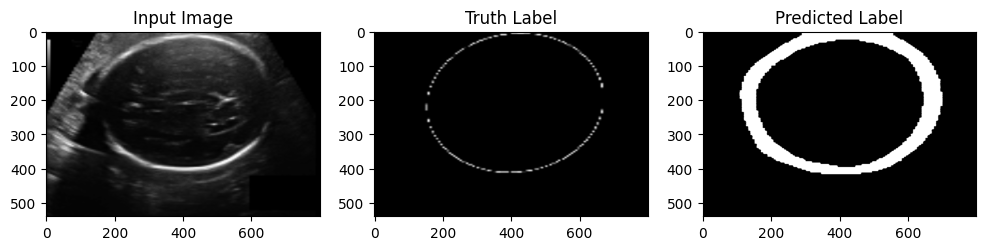

In [428]:
# Select a random index from test set
ix = random.randint(0, len(preds_test_t))

fig ,ax = plt.subplots(1,3,figsize=(12,6))
# Display the input image
ax[0].imshow(cv2.resize(X_test[ix],(800,540)),cmap='gray')
ax[0].set_title("Input Image")

# Display the ground truth label
ax[1].imshow(cv2.resize(Y_test[ix],(800,540)),cmap='gray')
ax[1].set_title("Truth Label")

# Display the predicted lebel
ax[2].imshow(cv2.resize(np.squeeze(preds_test_t[ix]),(800,540)),cmap='gray')
ax[2].set_title("Predicted Label")

### Problem7

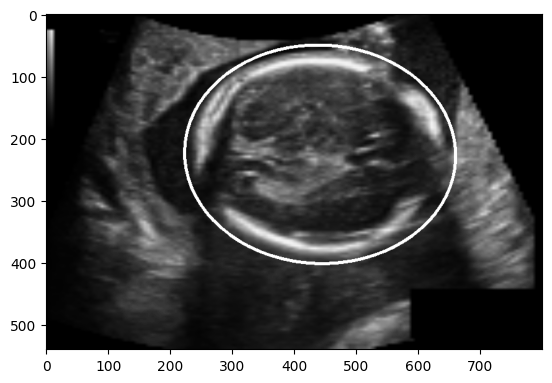

In [482]:
#ellipse fitting by RHT

# choose a random image from test set
ix = random.randint(0, len(preds_test_t))
#the input image
test_image=cv2.resize(X_test[ix],(800,540))
# the ground truth label
test_label=cv2.resize(Y_test[ix],(800,540))
# the predicted lebel
pred_label=cv2.resize(np.squeeze(preds_test_t[ix]),(800,540))
gray = pred_label
ret,thresh = cv2.threshold(gray,0,1,0)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
ellipse = cv2.fitEllipse(cnt)
img = test_image
cv2.ellipse(img,ellipse, (255,0,0), 3)
plt.imshow(img ,cmap = 'gray')

### Problem8
**I implement this part in colab.the notebook is available in project file.**

### Problem9
##### Comparing the results in the report.

## Bonus Part

**I implement this part in colab.the notebook is available in project file.**